This notebook is based on Andrew Ng's machine learning course on coursera

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') #certain display format and you can ignore this line of code
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression

## Data preparation

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


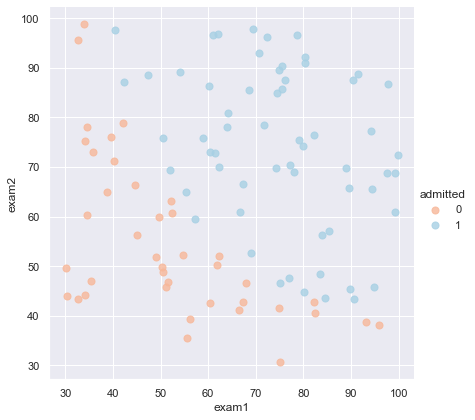

In [78]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show() #let's see how these datapoints distribute

In [14]:
def get_X(df): #Feature matrix
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)  #add one column of all ones as x0
    return data.iloc[:, :-1].to_numpy()  


def get_y(df): #Target variable -> last column
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]


def normalize_feature(df): #Feature normalization
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [15]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


## sigmoid function
The most common link function for logistic regression is sigmoid function and can be expressed as:
$$g(z)=\frac{1}{1+{{e}^{-z}}}$$ 
Therefore, the logitic regression model can be expressed as:
$${{h}_{\theta}}(x)=\frac{1}{1+{{e}^{-{{\theta}^{T}}X}}}$$ 


In [17]:
def sigmoid(z):
    # your code here  (appro ~ 1 lines)
    gz = 1/(1+np.exp(-z))
    return gz

Let's plot and see the sigmoid function

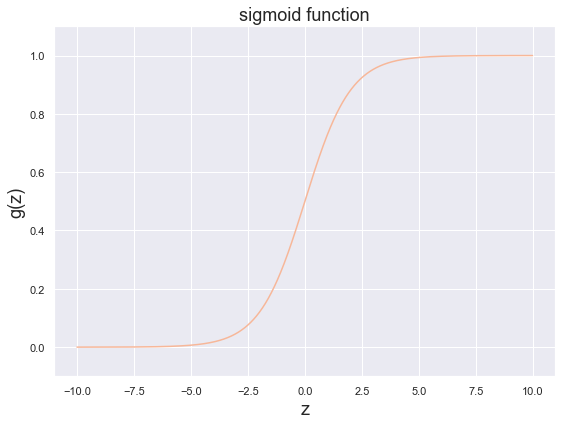

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

## cost function
Here we choose the commonly used binary cross entropy as the cost function of the logistic regression:

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}{[{{y}^{(i)}}\log({{h}_{\theta}}({{x}^{(i)}}))+(1-{{y}^{(i)}})\log(1-{{h}_{\theta}}({{x}^{(i)}}))]}$$
$$J(\theta)==\frac{1}{m}\sum_{i=1}^{m}{[-{{y}^{(i)}}\log({{h}_{\theta}}({{x}^{(i)}}))-(1-{{y}^{(i)}})\log(1-{{h}_{\theta}}({{x}^{(i)}}))]}$$

In [19]:
theta = theta=np.zeros(3) # X(m*n) so theta is n*1
theta

array([0., 0., 0.])

In [22]:
def cost(theta, X, y):
    # your code here  (appro ~ 2 lines)
    h = sigmoid(X@theta)
    costf = -1/len(y)*sum((y*np.log(h)+(1-y)*np.log(1-h)))
    return costf

In [23]:
cost(theta, X, y)

0.693147180559946

The output should be 0.6931471805599453

## batch gradient descent 
$$\frac{\partial J(\theta)}{\partial{\theta_{j}}} = \frac{1}{m} X^T( Sigmoid(X\theta) - y )$$

In [32]:
def gradient(theta, X, y):
    # your code here  (appro ~ 2 lines)
    h = sigmoid(X@theta) - y
    grad = X.T@h/len(y)
    return grad

In [33]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

## Optimization
> * Here I use the [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find the parameters


In [30]:
import scipy.optimize as opt

In [34]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

In [35]:
print(res)

     fun: 0.20349770339609613
     jac: array([5.82193561e-06, 3.03294619e-04, 2.91557210e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 30
    njev: 204
  status: 0
 success: True
       x: array([-25.15784822,   0.20620384,   0.20144339])


## Predication and evaluation on training set

In [173]:
def predict(x, theta):
    # your code here  (appro ~ 2 lines)
    probs = sigmoid(X@theta)
    y_pred = (probs>0.5).astype(int)
    return y_pred

In [174]:
final_theta = res.x #res.x is the theta after optimization
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



## Find the decision boundary
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

In [70]:
print(res.x) # this is final theta

[-25.15784822   0.20620384   0.20144339]


In [71]:
coef = -(res.x / res.x[2]) 
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x #decision boundary

[124.88792823  -1.02363167  -1.        ]


In [72]:
data.describe()  # find the range of x and y

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


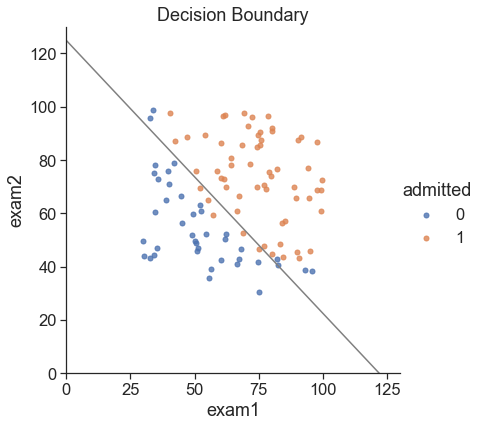

In [79]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

#  regularized logistic regression

In [80]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


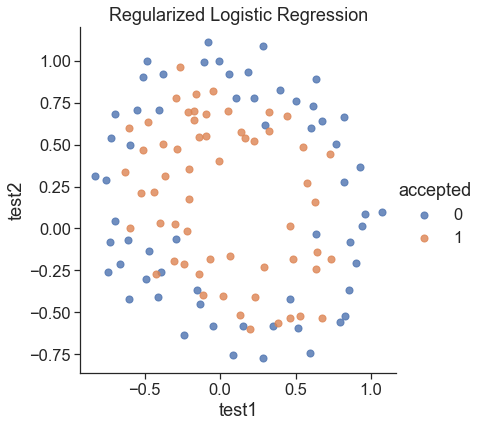

In [81]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

## feature mapping

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
$$mapFeature(x) =[1,x_{1},x_{2},x_{1}^{2},x_{1}x_{2},x_{2}^{2},x_{1}^{3},...,x_{1}x_{2}^{5},x_{2}^{6}]$$

In [87]:
def feature_mapping(x, y, power, as_ndarray=False):
    #return mapped features as ndarray or dataframe

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).to_numpy()
    else:
        return pd.DataFrame(data)


In [83]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [88]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [85]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646563,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


## regularized cost
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}{[-{{y}^{(i)}}\log({{h}_{\theta}}({{x}^{(i)}}))-(1-{{y}^{(i)}})\log(1-{{h}_{\theta}}({{x}^{(i)}}))]}+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^{2}}$$

In [89]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(df)
print(y.shape)

(118, 28)
(118,)


In [92]:
def regularized_cost(theta, X, y, l=1):
    # your code here  (appro ~ 3 lines)
    h = sigmoid(X@theta)
    costf = -1/len(y)*sum((y*np.log(h)+(1-y)*np.log(1-h)))
    regu_cost = costf + l/(2*len(y))*sum(np.power(theta,2))
    return regu_cost


In [93]:
regularized_cost(theta, X, y, l=1)

0.6931471805599461

Because thetas are all zero, so this value should be also 0.6931471805599461

## regularized gradient
$$\frac{\partial J(\theta)}{\partial{{\theta}_{j}}}=(\frac{1}{m}\sum_{i=1}^{m}{({{h}_{\theta}}({{x}^{(i)}})-{{y}^{(i)}})})+\frac{\lambda}{m}{{\theta}_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [149]:
def regularized_gradient(theta, X, y, l=1):
    # your code here  (appro ~ 2 lines)
    theta_ = (l/len(y))*theta[1:]
    regularized_term = np.concatenate([np.array([0]),theta_])
    
    return gradient(theta, X, y) + regularized_term

In [150]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## Optimization

In [160]:
import scipy.optimize as opt

In [163]:
print('init cost = {}'.format(regularized_cost(theta, X, y)))

res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)
res

init cost = 0.6931471805599461


     fun: 0.5358665695289436
     jac: array([ 9.00132779e-08,  8.32801581e-08, -3.21474482e-08, -3.70290193e-08,
        2.78669126e-08,  7.17975164e-08,  2.83120364e-08, -1.75806847e-08,
        2.59568319e-08,  1.67374324e-08, -4.04625586e-08, -4.85121800e-10,
       -2.14190632e-08,  6.00929663e-09,  3.48180058e-08,  7.49128631e-09,
       -5.79816906e-09, -1.82500001e-09, -8.17915371e-09,  1.12813648e-08,
        1.26388234e-08, -1.78497293e-08,  1.07451159e-09, -1.47570512e-08,
       -2.12911835e-09, -5.69505638e-09,  4.51579217e-10,  2.47294851e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 55
  status: 0
 success: True
       x: array([ 1.27273964,  0.62527118,  1.18108868, -2.01996119, -0.91742293,
       -1.43166357,  0.12400644, -0.36553443, -0.35723966, -0.17512979,
       -1.45815777, -0.05098974, -0.61555676, -0.27470648, -1.19281688,
       -0.24218825, -0.20600591, -0.04473157, -0.27778482, -0.29537813,
       -0.4

## Prediction

In [164]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



## Use different $\lambda$ 
## Plot the decision boundary
* $X\times \theta = 0$
* instead of solving polynomial equation, just create a x,y grid that is dense enough, and find all those $X\times \theta$ that are close enough to 0, then plot them

In [165]:
def draw_boundary(power, l):
#     power: polynomial power for mapped feature
#     l: lambda constant

    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y,color='red' , s=10)
    plt.title('Decision boundary')
    plt.show()

In [166]:
def feature_mapped_logistic_regression(power, l):
#     for drawing purpose only. not a well generalized logistic regression
#     power: raise x1, x2 to polynomial power
#     l: lambda constant for regularization term

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

In [167]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.to_numpy() @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01


## Change the value of $\lambda$ and see the result

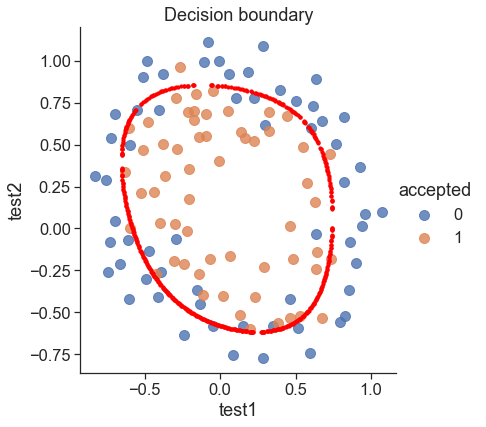

In [168]:
draw_boundary(power=6, l=1)     #set lambda = 1

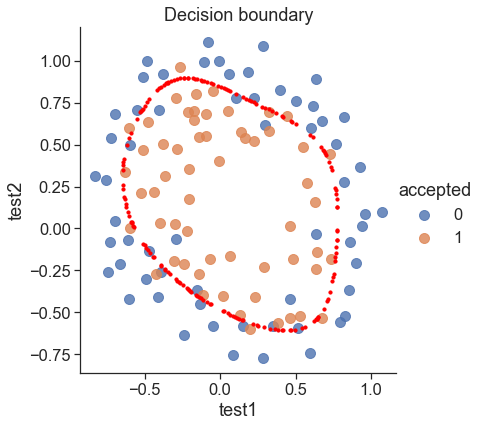

In [169]:
draw_boundary(power=6, l=0.01)  # set lambda < 0.1

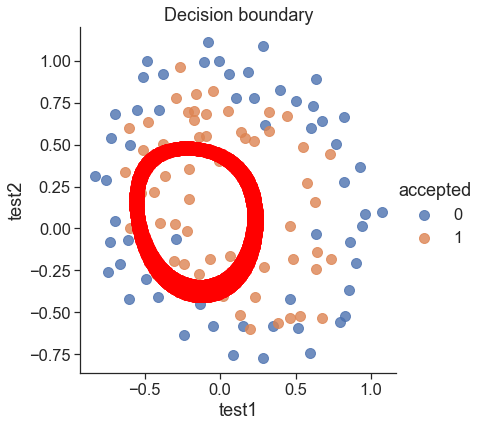

In [170]:
draw_boundary(power=6, l=100)  # set lambda > 10